In [219]:
%%capture
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import os

!pip install wordcloud
!pip install stop_words
!pip install spacy

from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
import spacy

!pip install vaderSentiment 
from vaderSentiment import vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [220]:
dat = pd.read_csv('C:/Users/pinak/Downloads/BeerDataScienceProject/BeerDataScienceProject.csv')
dat.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1.234818e+09
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3,stcules,3,"Dark red color, light beige foam, average. In ...",1.235915e+09
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3,stcules,3,"Almost totally black. Beige foam, quite compac...",1.235917e+09
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3,"Golden yellow color. White, compact foam, quit...",1.234725e+09
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1.293735e+09


In [221]:
dat.info()        # Info about variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528870 entries, 0 to 528869
Data columns (total 13 columns):
beer_ABV              508590 non-null float64
beer_beerId           528870 non-null int64
beer_brewerId         528870 non-null int64
beer_name             528870 non-null object
beer_style            528870 non-null object
review_appearance     528870 non-null float64
review_palette        528870 non-null float64
review_overall        528870 non-null float64
review_taste          528870 non-null object
review_profileName    528755 non-null object
review_aroma          528867 non-null object
review_text           528754 non-null object
review_time           528076 non-null float64
dtypes: float64(5), int64(2), object(6)
memory usage: 52.5+ MB


In [222]:
dat.describe()          # Description of numeric vars.

,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_palette,review_overall,review_time
count,508590.000000,528870.000000,528870.000000,528870.000000,528870.000000,528870.000000,5.280760e+05
mean,7.017442,22098.466016,2598.423429,3.864467,3.758876,3.833168,1.224830e+09
std,2.204460,22158.284352,5281.805350,0.604047,0.685393,0.709919,7.607243e+07
min,0.010000,3.000000,1.000000,0.000000,1.000000,0.000000,8.843904e+08
25%,5.300000,1745.000000,132.000000,3.500000,3.500000,3.500000,1.174516e+09
50%,6.500000,14368.000000,394.000000,4.000000,4.000000,4.000000,1.240328e+09
75%,8.500000,40528.000000,1475.000000,4.000000,4.000000,4.500000,1.288504e+09
max,57.700000,77310.000000,27980.000000,5.000000,5.000000,5.000000,1.326277e+09


In [223]:
nRow, nCol = dat.shape
print(f'The data has {nRow} rows and {nCol} columns')
print(' ')
print('The variables present in our beer review dataset include:',list(dat.columns))
print(' ')
print('There are',dat.beer_brewerId.nunique(),'different breweries in the dataset.')
print('There exist',dat.beer_name.nunique(),'unique beer names in this dataset.')
print('We have',dat.beer_style.nunique(),'different beer styles present in our data.')
print(dat.review_profileName.nunique(), 'number of distinct profiles have contributed to the beer reviews data.')

The data has 528870 rows and 13 columns
 
The variables present in our beer review dataset include: ['beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name', 'beer_style', 'review_appearance', 'review_palette', 'review_overall', 'review_taste', 'review_profileName', 'review_aroma', 'review_text', 'review_time']
 
There are 1803 different breweries in the dataset.
There exist 18339 unique beer names in this dataset.
We have 113 different beer styles present in our data.
22794 number of distinct profiles have contributed to the beer reviews data.


In [224]:
dat.isnull().sum()          # Total null values in the data.

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              3
review_text             116
review_time             794
dtype: int64

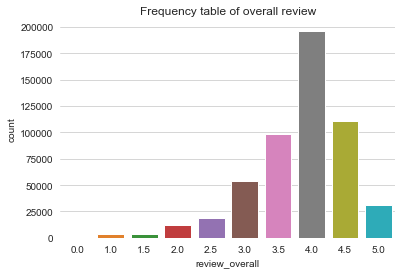

In [225]:
# Get a frequency plot for data distribution.
ax = sns.countplot(x='review_overall', data=dat)
ax.set(title='Frequency table of overall review')
sns.despine(left=True, bottom=True)

# Questions

# Q1. Rank top 3 Breweries which produce the strongest beers?

Top 3 strongest beers by their ABV value are: ['Schorschbr? Schorschbock 57%', 'Schorschbr? Schorschbock 43%', 'Schorschbr? Schorschbock 43%']
 
Top 3 breweries producing the strongest beers by their mean ABV value have brewerIDs: ['6513', '736', '24215']


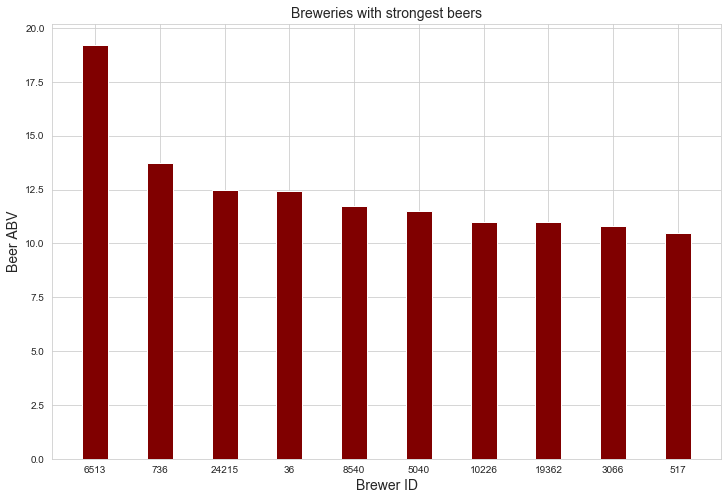

In [226]:
dat.beer_brewerId = dat.beer_brewerId.astype('str')

dat_abv = dat[['beer_brewerId','beer_name','beer_ABV']]

strongest_beers = dat_abv.sort_values(by = 'beer_ABV',ascending = False)      # Sorting of data by values.
strongest_beers =  strongest_beers.dropna()          # Removing NAs, as these are very few in number.
print('Top 3 strongest beers by their ABV value are:', list(strongest_beers.beer_name[0:3]))
print(' ')

# Sort by values and find mean of numeric variables.
strongest_breweries = strongest_beers.groupby('beer_brewerId', as_index=False)['beer_ABV'].mean().sort_values(by = 'beer_ABV',ascending = False)
print('Top 3 breweries producing the strongest beers by their mean ABV value have brewerIDs:', list(strongest_breweries.beer_brewerId[0:3]))

# Plot a bar graph.
strongest_breweries10 = strongest_breweries.head(10)
fig = plt.figure(figsize = (12, 8))  
plt.bar(strongest_breweries10.beer_brewerId, strongest_breweries10.beer_ABV, color ='maroon',  
        width = 0.4) 
plt.xlabel('Brewer ID',fontsize=14) 
plt.ylabel('Beer ABV',fontsize=14) 
plt.title('Breweries with strongest beers',fontsize=14) 
plt.show() 

In [227]:
strongest_breweries.head()

,beer_brewerId,beer_ABV
1338,6513,19.228824
1412,736,13.750000
786,24215,12.466667
1064,36,12.445860
1493,8540,11.750000


# Q2. Which year did beers enjoy the highest ratings?

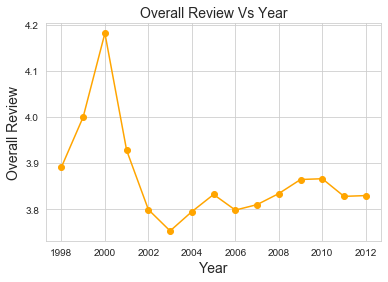

 
Beers enjoyed overall highest ratings in the year: 2000


In [228]:
# Converting to datetime.
dat['review_time'] = pd.to_datetime(dat['review_time'], unit='s')
highest_ratings = dat[['review_time','review_overall']]
highest_ratings['year'] = pd.DatetimeIndex(highest_ratings['review_time']).year # Extracting year from datetime.
highest_ratings = highest_ratings.dropna()
highest_ratings['year'] = highest_ratings['year'].astype('int')

highest_ratings_yearwise = highest_ratings.groupby('year', as_index=False)['review_overall'].mean().sort_values(by = 'year',ascending = False)
plt.plot(highest_ratings_yearwise['year'], highest_ratings_yearwise['review_overall'], color='orange', marker='o')
plt.title('Overall Review Vs Year', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Overall Review', fontsize=14)
plt.show()
print(' ')

highest_ratings_yearwise = highest_ratings.groupby('year', as_index=False)['review_overall'].mean().sort_values(by = 'review_overall',ascending = False)
highest_ratings_yearwise = highest_ratings_yearwise.reset_index(drop=True)
print('Beers enjoyed overall highest ratings in the year:', highest_ratings_yearwise.year[0])

# Q3. Based on the user’s ratings which factors are important among taste, aroma, appearance, and palette?

In [229]:
factors = dat[['review_appearance','review_palette','review_overall','review_aroma','review_taste']]

for i in factors.columns:
    # As we have string values in the float variables.
    factors[i] = pd.to_numeric(factors[i], 'coerce').pipe(lambda s: s.fillna(s.mean()))  
    factors[i] = factors[i].astype(float)
    Correlation = factors['review_overall'].corr(factors[i],'spearman')
    print('Correlation of',i,'with the overall review is',Correlation)
print(' ')

factors.corr('spearman')          # Plotting a spearman corr plot.

Correlation of review_appearance with the overall review is 0.44576182779578394
Correlation of review_palette with the overall review is 0.5462758461549491
Correlation of review_overall with the overall review is 1.0
Correlation of review_aroma with the overall review is 0.7216945349950475
Correlation of review_taste with the overall review is 0.6423607404865074
 


,review_appearance,review_palette,review_overall,review_aroma,review_taste
review_appearance,1.000000,0.490881,0.445762,0.487024,0.507227
review_palette,0.490881,1.000000,0.546276,0.661132,0.554522
review_overall,0.445762,0.546276,1.000000,0.721695,0.642361
review_aroma,0.487024,0.661132,0.721695,1.000000,0.677481
review_taste,0.507227,0.554522,0.642361,0.677481,1.000000


# Q4. If you were to recommend 3 beers to your friends based on this data which ones will you recommend?

In [230]:
reccomendation = dat[['beer_name','beer_style','review_overall']]

reccomendation_rev = reccomendation.groupby('beer_name', as_index=False)['review_overall'].mean().sort_values(by = 'review_overall',ascending = False)
print('Three Most recommended bear by mean overall rating are:', list(reccomendation_rev.beer_name[0:3]))
print(' ')

reccomendation_rev_style = reccomendation.groupby(['beer_name','beer_style'], as_index=False)['review_overall'].mean().sort_values(by = 'review_overall',ascending = False)
reccomendation_rev_style = reccomendation_rev_style.reset_index(drop=True)
for i in range(3):
    print('If you love',reccomendation_rev_style.beer_style[i],', you should try',reccomendation_rev_style.beer_name[i])
print(' ')

# Getting review counts for beers.
recommendation_rev_counts = reccomendation[['beer_name','review_overall']].pivot_table(index='beer_name', aggfunc=('count','mean')).dropna()
recommendation_rev_counts.columns = recommendation_rev_counts.columns.to_series().str.join('_')
recommendation_rev_counts = recommendation_rev_counts.query('review_overall_count >= 1000').sort_values('review_overall_mean', ascending=False).head(3)
recommendation_rev_counts.reset_index(level=0, inplace=True)
recommendation_rev_counts = recommendation_rev_counts.reset_index(drop=True)

for i in range(3):
    if i == 0:
        print('Beer with the highest number of reviews is,',recommendation_rev_counts.beer_name[i],',with a mean overall review of,',recommendation_rev_counts.review_overall_mean[i])
    elif i == 1:
        print('Beer with the second highest number of reviews is,',recommendation_rev_counts.beer_name[i],',with a mean overall review of,',recommendation_rev_counts.review_overall_mean[i])
    else:
        print('Beer with the third highest number of reviews is,',recommendation_rev_counts.beer_name[i],',with a mean overall review of,',recommendation_rev_counts.review_overall_mean[i])

Three Most recommended bear by mean overall rating are: ['Pioneer Bavarian Wheat', 'Amarillo Single Hop Pale Ale', 'Kimono Girl']
 
If you love English Barleywine , you should try Jasper Murdock's Private Stock '04
If you love American Brown Ale , you should try Gene's American Brown Ale
If you love English Stout , you should try Fuggit Stout
 
Beer with the highest number of reviews is, Founders KBS (Kentucky Breakfast Stout) ,with a mean overall review of, 4.39751552795031
Beer with the second highest number of reviews is, Tr?gs Nugget Nectar ,with a mean overall review of, 4.395652173913043
Beer with the third highest number of reviews is, Founders Breakfast Stout ,with a mean overall review of, 4.354516386890488


In [231]:
reccomendation_rev_style.head(3)

,beer_name,beer_style,review_overall
0,Jasper Murdock's Private Stock '04,English Barleywine,5.0
1,Gene's American Brown Ale,American Brown Ale,5.0
2,Fuggit Stout,English Stout,5.0


# Generating sentiment score

In [232]:

revs = dat[['beer_style','review_overall','review_text']]
revs = revs.dropna()
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+|@[^\s]+')
    return url_pattern.sub(r'', text)
revs['review_textclean'] = revs['review_text'].apply(lambda text: remove_urls(text))   # Remove URLs from the text data.

sent_analyser = SentimentIntensityAnalyzer()
def sentiment(text):
    return (sent_analyser.polarity_scores(text)['compound'])         # Generates a polarity score.

revs['Sentiment_Score'] = revs['review_textclean'].apply(sentiment)   # The polarity score is named as sentiment score.

# Q5. Which Beer style seems to be the favorite based on reviews written by users?

Top 3 beer styles by customer reviews are: ['Quadrupel (Quad)', 'Eisbock', 'Flanders Red Ale']
 


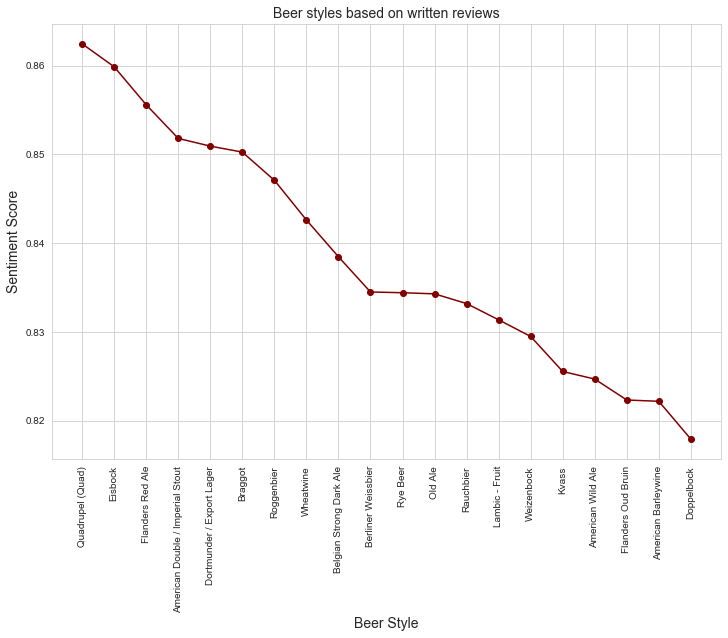

In [233]:
revs_toprated = revs.groupby('beer_style', as_index=False)['Sentiment_Score','review_overall'].mean().sort_values(by = 'Sentiment_Score',ascending = False)
print('Top 3 beer styles by customer reviews are:',list(revs_toprated.beer_style[0:3]))
print(' ')

revs_toprated10 = revs_toprated.head(20)
fig = plt.figure(figsize = (12, 8))  
plt.plot(revs_toprated10.beer_style, revs_toprated10.Sentiment_Score, color='maroon', marker='o')
plt.xlabel('Beer Style',fontsize=14) 
plt.ylabel('Sentiment Score',fontsize=14) 
plt.title('Beer styles based on written reviews',fontsize=14) 
plt.xticks(rotation=90)
plt.show() 

# Q6. How does written review compare to overall review score for the beer styles?

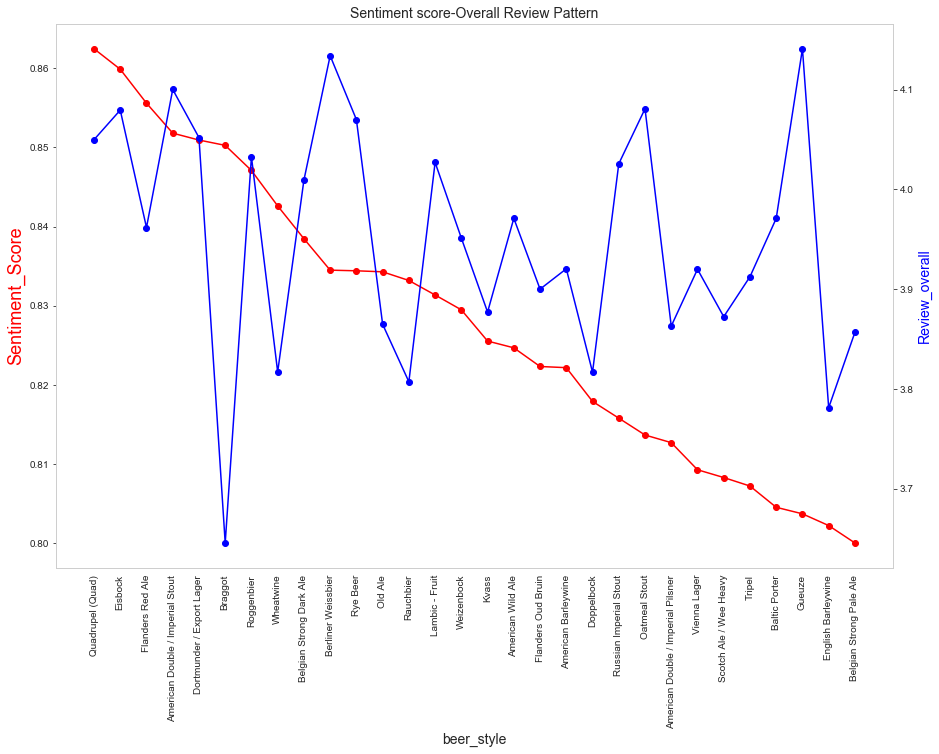

Value of ont to one correlations between overall review and sentiment score is 0.3671875814411625
 
Value of correlations between mean overall review and mean sentiment score is 0.674822403340472
 
There is a moderate correlation between Text reviews and Overall Review with a value of 0.674822403340472 . Hence, text reviews are neither a strong nor weak measure of the overall reviews.


In [234]:
revs_top10 = revs_toprated.head(30)

# Plot a twin plot to understand patterns of the overall review and sentiment score data.
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(15,10))
ax.plot(revs_top10.beer_style, revs_top10.Sentiment_Score, color='red', marker='o')
ax.set_xlabel('beer_style',fontsize=14)
ax.set_ylabel('Sentiment_Score',color='red',fontsize=18)
plt.xticks(rotation=90)
plt.title('Sentiment score-Overall Review Pattern', fontsize=14)
ax.grid(False)
ax2=ax.twinx()
ax2.plot(revs_top10.beer_style, revs_top10.review_overall,color='blue',marker='o')
ax2.set_ylabel('Review_overall',color='blue',fontsize=14)
ax2.grid(False)
plt.show()
    
correlation = revs['review_overall'].corr(revs['Sentiment_Score'],'spearman')
correlations = revs_toprated['review_overall'].corr(revs_toprated['Sentiment_Score'],'spearman')
print('Value of ont to one correlations between overall review and sentiment score is',correlation)
print(' ')
print('Value of correlations between mean overall review and mean sentiment score is',correlations)
print(' ')

if correlations > 0.7:
    print('There is a strong correlation between Text reviews and Overall Review with a value of',correlations,'. Hence, text reviews are a strong measure of the overall reviews.')
elif correlations < 0.5:
    print('There is a weak correlation between Text reviews and Overall Review with a value of',correlations,'. Hence, text reviews are not a strong measure of the overall reviews.')
else:
    print('There is a moderate correlation between Text reviews and Overall Review with a value of',correlations,'. Hence, text reviews are neither a strong nor weak measure of the overall reviews.')

# Classifying Sentiments

There are 423035 Positive reviews.
There are 52303 Neutral reviews.
There are 53416 Negative reviews.
 


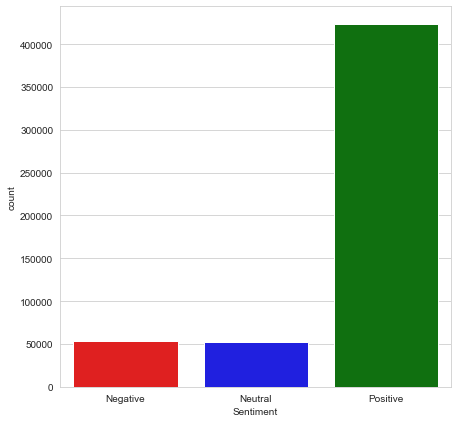

In [235]:
# Classifying text reviews based on sentiment score.
def sentimnt(revs):
    if revs['Sentiment_Score'] >= 0.7:
        val = 'Positive'
    elif revs['Sentiment_Score'] <= 0.3:
        val = 'Negative'
    else:
        val = 'Neutral'
    return val
revs['Sentiment'] = revs.apply(sentimnt, axis=1)

sents_list = ['Positive','Neutral','Negative']
for i in sents_list:
    sents = revs[revs['Sentiment'] == i]
    print('There are',sents.Sentiment.value_counts()[0],i,'reviews.')
print(' ')

plt.figure(figsize=(7,7))
sns.set_style('whitegrid')
ax = sns.countplot(x='Sentiment', data=revs, 
                  palette=dict(Neutral='blue', Positive='Green', Negative='Red'))

# Generating a word cloud

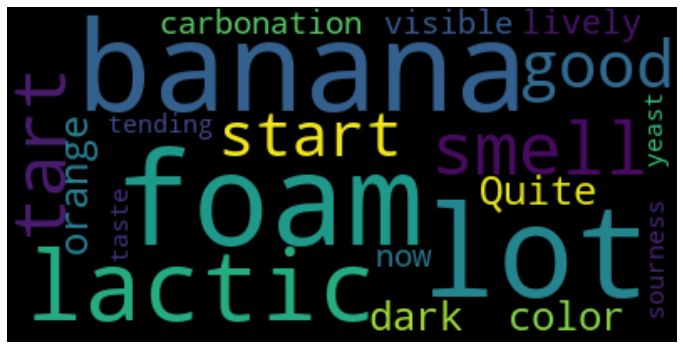

In [243]:
# Generate word cloud for first review only.

text = revs.review_textclean[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.figure(figsize=[12,8])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()